# Notebook for exploratory 311 data analysis for Red Hook zip code

Full disclosure: anything remotely fancy taken from https://github.com/Casyfill/parqa/blob/master/311/311_opendata.ipynb

In [32]:
from __future__ import print_function
__author__ = 'mo'
import pylab as pl
import numpy as np
%pylab inline

import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
import geopandas as gp
import json

import statsmodels.formula.api as smf
from statsmodels.graphics.api import abline_plot 


import sklearn.cluster
from sklearn import mixture
from PIL import Image
from scipy.misc import imread
from scipy.cluster.vq import kmeans2
#import mplleaflet
#import shapely.geometry as geom
import networkx as nx
import xlrd

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [2]:
data311 = pd.read_csv('311RedHook.csv')

/Users/mariaortiz/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2902: DtypeWarning: Columns (39) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Looking at data

In [3]:
data311.columns

Index([u'﻿Unique Key', u'Created Date', u'Closed Date', u'Agency',
       u'Agency Name', u'Complaint Type', u'Descriptor', u'Location Type',
       u'Incident Zip', u'Incident Address', u'Street Name', u'Cross Street 1',
       u'Cross Street 2', u'Intersection Street 1', u'Intersection Street 2',
       u'Address Type', u'City', u'Landmark', u'Facility Type', u'Status',
       u'Due Date', u'Resolution Description',
       u'Resolution Action Updated Date', u'Community Board', u'Borough',
       u'X Coordinate (State Plane)', u'Y Coordinate (State Plane)',
       u'Park Facility Name', u'Park Borough', u'School Name',
       u'School Number', u'School Region', u'School Code',
       u'School Phone Number', u'School Address', u'School City',
       u'School State', u'School Zip', u'School Not Found',
       u'School or Citywide Complaint', u'Vehicle Type',
       u'Taxi Company Borough', u'Taxi Pick Up Location',
       u'Bridge Highway Name', u'Bridge Highway Direction', u'Road Ramp'

In [8]:
data311.count()

﻿Unique Key                       42369
Created Date                      42369
Closed Date                       40601
Agency                            42369
Agency Name                       42369
Complaint Type                    42369
Descriptor                        42235
Location Type                     25603
Incident Zip                      42369
Incident Address                  31568
Street Name                       31568
Cross Street 1                    31083
Cross Street 2                    31055
Intersection Street 1             10226
Intersection Street 2             10226
Address Type                      41549
City                              42365
Landmark                             37
Facility Type                      9319
Status                            42369
Due Date                          15157
Resolution Description            19972
Resolution Action Updated Date    41494
Community Board                   42369
Borough                           42369


In [31]:
#looking at columns
for i, x in enumerate(data311.columns): print( i,': ', x)

0 :  ﻿Unique Key
1 :  Created Date
2 :  Closed Date
3 :  Agency
4 :  Agency Name
5 :  Complaint Type
6 :  Descriptor
7 :  Location Type
8 :  Incident Zip
9 :  Incident Address
10 :  Street Name
11 :  Cross Street 1
12 :  Cross Street 2
13 :  Intersection Street 1
14 :  Intersection Street 2
15 :  Address Type
16 :  City
17 :  Landmark
18 :  Facility Type
19 :  Status
20 :  Due Date
21 :  Resolution Description
22 :  Resolution Action Updated Date
23 :  Community Board
24 :  Borough
25 :  X Coordinate (State Plane)
26 :  Y Coordinate (State Plane)
27 :  Park Facility Name
28 :  Park Borough
29 :  School Name
30 :  School Number
31 :  School Region
32 :  School Code
33 :  School Phone Number
34 :  School Address
35 :  School City
36 :  School State
37 :  School Zip
38 :  School Not Found
39 :  School or Citywide Complaint
40 :  Vehicle Type
41 :  Taxi Company Borough
42 :  Taxi Pick Up Location
43 :  Bridge Highway Name
44 :  Bridge Highway Direction
45 :  Road Ramp
46 :  Bridge Highway 

In [7]:
data311['Incident Zip'].count()

42369

In [13]:
data311['Complaint Type'].unique()

array(['Dirty Conditions', 'Street Condition', 'Noise - Commercial',
       'General Construction/Plumbing', 'Sanitation Condition',
       'Illegal Parking', 'Street Light Condition', 'Sewer', 'Smoking',
       'Electrical', 'Derelict Vehicles', 'Air Quality',
       'Investigations and Discipline (IAD)', 'Noise', 'Building/Use',
       'Overgrown Tree/Branches', 'Traffic Signal Condition',
       'Water System', 'Lead', 'Missed Collection (All Materials)',
       'Special Enforcement', 'Plumbing', 'Hazardous Materials',
       'Elevator', 'Graffiti', 'Taxi Complaint', 'Vector',
       'For Hire Vehicle Complaint', 'Water Conservation',
       'Cranes and Derricks', 'Other Enforcement',
       'Overflowing Litter Baskets', 'PAINT/PLASTER',
       'Noise - Street/Sidewalk', 'Damaged Tree', 'Street Sign - Missing',
       'Industrial Waste', 'Dead Tree',
       'Special Projects Inspection Team (SPIT)', 'Traffic',
       'Consumer Complaint', 'Blocked Driveway', 'Asbestos',
       'Swee

# Top 20 complaints by type

In [59]:
#looking at top 20 
top20 = data311['Complaint Type'].value_counts().head(20)
top20

Street Condition                     3670
Street Light Condition               3509
Noise                                2132
Illegal Parking                      2120
General Construction/Plumbing        1538
Water System                         1479
HEATING                              1433
Sanitation Condition                 1175
Blocked Driveway                     1117
Missed Collection (All Materials)    1061
Dirty Conditions                     1041
Sewer                                 999
Noise - Commercial                    892
Traffic Signal Condition              884
GENERAL CONSTRUCTION                  856
Damaged Tree                          821
PLUMBING                              751
HEAT/HOT WATER                        699
Taxi Complaint                        661
Rodent                                617
Name: Complaint Type, dtype: int64

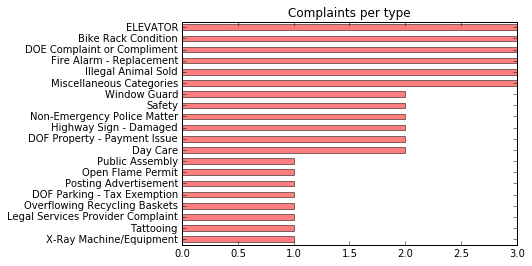

In [74]:
#this graph needs work...
#top20.value_counts(ascending=True).plot(kind='barh', color='red', alpha=.5, title='Complaints per type')
data311['Complaint Type'].value_counts(ascending=True).head(20).plot(kind='barh', color='red', alpha=.5, title='Complaints per type')

# Type of complaint by agency

In [48]:
data311.groupby('Agency')['Complaint Type'].value_counts()

Agency  Complaint Type                         
3-1-1   Noise Survey                                 52
        OEM Disabled Vehicle                         21
        City Vehicle Placard Complaint               12
DCA     Consumer Complaint                          608
DEP     Noise                                      2132
        Water System                               1479
        Sewer                                       999
        Air Quality                                 588
        Lead                                        465
        Hazardous Materials                         258
        Water Conservation                          133
        Asbestos                                     83
        Industrial Waste                             83
        Water Quality                                48
DFTA    Senior Center Complaint                      11
        Legal Services Provider Complaint             1
DHS     Homeless Person Assistance                   31


# Complaints per year

In [65]:
#creating column per year and parsing dates
data311['Created Date'] = pd.to_datetime(data311['Created Date'], format = '%m/%d/%Y %I:%M:%S %p')
data311['year'] = data311['Created Date'].apply(lambda x: x.year)

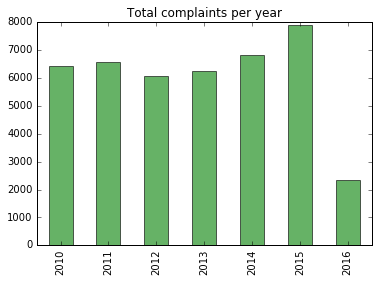

In [72]:
#plotting complaints per year
data311['year'].value_counts().sort_index().plot(kind='bar', color='green', alpha=.6, title='Total complaints per year');